In [4]:
from py_factorio_blueprints.util import *
from PIL import Image, ImagePalette
from collections import defaultdict


In [5]:
def get_avg_color(img):
    sr, sg, sb, sa = 0, 0, 0, 0
    # print([x for x in img.getdata()])
    for r, g, b, a, in img.getdata():
        sr += r * a;
        sg += g * a
        sb += b * a
        sa += a
    return sr // sa, sg // sa, sb // sa

def color_dist(c1, c2):
    return (c1[0] - c2[0]) ** 2 + (c1[1] - c2[1]) ** 2 + (c1[2] - c2[2]) ** 2


In [6]:
PATH = '/mnt/c/Program Files (x86)/Steam/steamapps/common/Factorio/data/base/graphics/icons'

MATERIALS = [
    'iron-plate',
    'copper-plate',
    'plastic-bar',
    'assembling-machine-1',
    'assembling-machine-2',
    'blueprint',
    'cliff-explosives',
    'coal',
    'concrete',
    'deconstruction-planner',
    'effectivity-module',
    'electronic-circuit',
    'explosives',
    'hazard-concrete',
    'iron-chest',
    'iron-ore',
    'landfill',
    'processing-unit',
    'productivity-module',
    'small-lamp',
    'solid-fuel',
    'speed-module',
    'stone',
    'steel-plate',
    'steel-chest',
    'stone-brick',
    'upgrade-planner',
    'wooden-chest'
]
COLORS = {}

for name in MATERIALS:
    img = Image.open(f"{PATH}/{name}.png").crop((0, 0, 64, 64)).convert("RGBA")
    COLORS[get_avg_color(img)] = name

COLORS


{(134, 134, 134): 'iron-plate',
 (179, 110, 87): 'copper-plate',
 (197, 197, 197): 'plastic-bar',
 (97, 81, 71): 'assembling-machine-1',
 (75, 74, 86): 'assembling-machine-2',
 (54, 130, 192): 'blueprint',
 (64, 107, 132): 'cliff-explosives',
 (44, 40, 36): 'coal',
 (118, 121, 122): 'concrete',
 (197, 59, 59): 'deconstruction-planner',
 (87, 121, 68): 'effectivity-module',
 (95, 136, 39): 'electronic-circuit',
 (132, 73, 64): 'explosives',
 (111, 109, 89): 'hazard-concrete',
 (108, 92, 77): 'iron-chest',
 (80, 102, 113): 'iron-ore',
 (133, 124, 57): 'landfill',
 (85, 104, 164): 'processing-unit',
 (136, 89, 61): 'productivity-module',
 (158, 154, 152): 'small-lamp',
 (74, 74, 74): 'solid-fuel',
 (72, 112, 127): 'speed-module',
 (121, 102, 68): 'stone',
 (117, 118, 114): 'steel-plate',
 (119, 103, 101): 'steel-chest',
 (111, 112, 107): 'stone-brick',
 (19, 149, 20): 'upgrade-planner',
 (130, 98, 46): 'wooden-chest'}

47 32


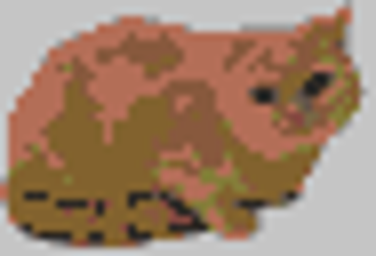

In [7]:
cat = Image.open('cat.jpg')
cat.thumbnail((10**9, 32))

width, height = cat.size
print(width, height)

mp = defaultdict(int)

for x in range(width):
   for y in range(height):
       c_orig = cat.getpixel((x, y))
       _, name, c_new = min(((color_dist(c_orig, color), name, color) for color, name in COLORS.items()))
       mp[name] += 1
       cat.putpixel((x, y), c_new)

cat.resize((cat.width * 8, cat.height * 8))


In [47]:
def convert(image: Image, palette: list, W_ROUND=4, H=32):
    width, height = image.size
    width, height = (H * width) // (height * W_ROUND) * W_ROUND, H
    image = image.resize((width, height))

    data = [[None] * H for _ in range(width)]

    for x in range(width):
        for y in range(height):
            c_orig = image.getpixel((x, y))
            _, rgb = min(((color_dist(c_orig, color), color) for color in palette))

            image.putpixel((x, y), rgb)
            data[x][y] = rgb

    return image, data


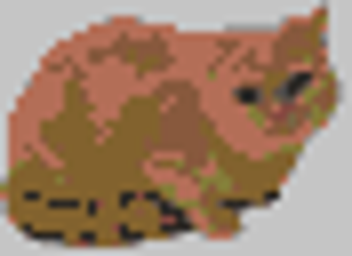

In [49]:
cat = Image.open('cat.jpg')
cat, mp = convert(cat, COLORS.keys())
cat.resize((cat.width * 8, cat.height * 8))


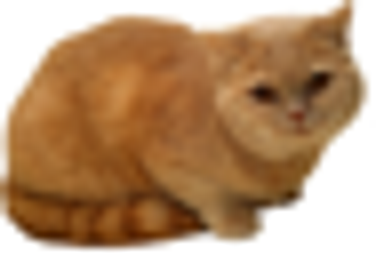

In [31]:
cat = Image.open('cat.jpg')
cat.thumbnail((10**9, 32))

cat.resize((cat.width * 8, cat.height * 8))


In [ ]:
from futil import *

bl = Blueprint()

bl.create_constant(0, 0)
bl.create_decider(1, 0, 15)

bl.add_connection(0, 0, Blueprint.CONN_CONSTANT, 1, 0, Blueprint.CONN_DECIDER_IN, 'green')
bl.add_connection(1, 0, Blueprint.CONN_DECIDER_OUT, 1, 0, Blueprint.CONN_DECIDER_IN, 'green')

bl.pr()


0

In [ ]:
Blueprint(string='0eNqtkdsKwjAQRP9lnqPQi7bmV0Skl0UW7KYkqVhK/t2kfREEQfAlZMLsmWGzoL1PNFoWD72AOyMO+rzA8U2ae3rz80jQYE8DFKQZkko+34jfdWZoWRpvLIICS09P6CxcFEg8e6YNt4r5KtPQko2GryCF0bg4ayTlJ97xsD8ozNBlvMScni11myFXiSGbdGkgS4el/j2Yo8rDJYSgPsrkv5Yp/1AmW8vENa171W/foPAg6zZcnZXVKa+quqiL4hjCC8Brj/o=')._root
